# Lab1 - Scikit-learn
Author: RYAN BAKER

## 1. Overview

At the end, you are asked to answer the following questions in **Section 5.1 Questions** in the notebook:

1. For each task (classification and regression), which model performs best on the validation data using all features?
2. For each task (classification and regression), which model performs best on the validation data using two principal components?
3. In each task (classification and regression), for each model, how do full feature and two principal component model scores compare on the validation data?
4. Do any of the models underfit or overfit? Provide examples.

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Function definitions

In [200]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def get_classifier_accuracy(model, X, y):
    '''Calculate train and validation accuracy of classifier (model)
        
        Splits feature matrix X and target vector y 
        with sklearn train_test_split() and random_state=956.
        
        model (sklearn classifier): Classifier to train and evaluate
        X (numpy.array or pandas.DataFrame): Feature matrix
        y (numpy.array or pandas.Series): Target vector
        
        returns: training accuracy, validation accuracy
    
    '''
    
    #TODO: IMPLEMENT FUNCTION BODY
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=956)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return (model.score(X_train, y_train), accuracy_score(y_test, y_pred))

In [201]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def get_regressor_mse(model, X, y):
    '''Calculate train and validation mean-squared error (mse) of regressor (model)
        
        Splits feature matrix X and target vector y 
        with sklearn train_test_split() and random_state=956.
        
        model (sklearn regressor): Regressor to train and evaluate
        X (numpy.array or pandas.DataFrame): Feature matrix
        y (numpy.array or pandas.Series): Target vector
        
        returns: training mse, validation mse
    
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=956)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    return (model.score(X, y), mean_squared_error(y_test, y_pred))

In [202]:
from sklearn.decomposition import PCA

def get_n_principal_components(X, n=2):
    '''Extracts n principal componets from feature matrix X using sklearn PCA.
        X (pandas.DataFrame): A feature matrix
        n (int): number of principal components
        
        returns: feature matrix with n columns as numpy.array
    '''
    
    model = PCA(n_components = n)
    model.fit(X)
    X_n = model.transform(X)
    return X_n

## 3. Classification

Using yellowbrick spam - classification  
https://www.scikit-yb.org/en/latest/api/datasets/spam.html

The goal is to compare `LogisticRegression(max_iter=2000)` and `RandomForestClassifier(random_state=88)` classification performance on a validation set with full features and first two principal components.

### 3.1 Load data

Load the spam data set into feature matrix `X` and target vector `y`.

Call `get_n_principal_components()` to obtain feature matrix `X_2D` containing the first two principal components.

Print dimensions and type of `X`, `y`, and `X_2D`.


In [203]:
from yellowbrick.datasets import load_spam
(X, y) = load_spam()
X_2D = get_n_principal_components(X, 2)



### 3.2 Train and evaluate models

1. Import `LogisticRegression` and `RandomForestClassifier` from sklearn
2. Instantiate models `LogisticRegression(max_iter=2000)` and `RandomForestClassifier(random_state=88)` in a list.
3. create a for loop iterating the models list:
    - Call `get_classifier_accuracy()` using all features, i.e. `X`.
    - Call `get_classifier_accuracy()` using PCA features, i.e. `X_2D`.
    - Print training and validation accuracy for both. Limit output to **3 decimal places**.

In [204]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
models = [LogisticRegression(max_iter=2000),
          RandomForestClassifier(random_state=88)
         ]
for i, model in enumerate(models):
    for feature in ("All Features", "PCA"):
        scores = get_classifier_accuracy(model, X_2D if feature == "PCA" else X, y)
        print(f'{"LogisticRegression" if i==0 else "RandomForestClassifier"}, {feature}:')
        print(f'Training Accuracy: {scores[0]:.3f}, Validation Accuracy: {scores[1]:.3f}')
        print()



LogisticRegression, All Features:
Training Accuracy: 0.934, Validation Accuracy: 0.917

LogisticRegression, PCA:
Training Accuracy: 0.729, Validation Accuracy: 0.725

RandomForestClassifier, All Features:
Training Accuracy: 0.999, Validation Accuracy: 0.944

RandomForestClassifier, PCA:
Training Accuracy: 0.999, Validation Accuracy: 0.771



### 3.3 Plot PCA feautures
Use a Seaborn `scatterplot` to visulaize the two PCA components using the lables in `y` as `hue`.

Label x- and y-axis and add a title.

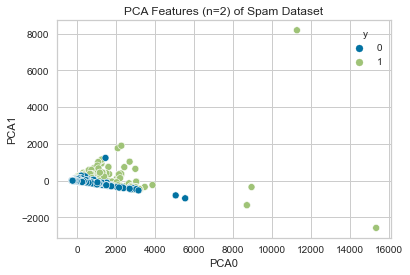

In [205]:
spam = pd.DataFrame()
spam['PCA0'] = X_2D[:,0]
spam['PCA1'] = X_2D[:,1]
spam['y'] = y
sns.scatterplot(data=spam, x='PCA0', y='PCA1', hue='y').set(title='PCA Features (n=2) of Spam Dataset');



## 4. Regression

Using yellowbrick energy - regression  
https://www.scikit-yb.org/en/latest/api/datasets/energy.html

The goal is to compare `LinearRegression()` and `RandomForestRegressor(random_state=88)` regression performance on a validation set with full features and first two principal components.

### 4.1 Load data

Load the energy data set into feature matrix `X` and target vector `y`.

Call `get_n_principal_components()` to obtain feature matrix `X_2D` containing the first two principal components.

Print dimensions and type of `X`, `y`, and `X_2D`.

In [206]:
from yellowbrick.datasets import load_energy
X, y = load_energy()
X_2D = get_n_principal_components(X, 2)
print(f'X dimensions: {X.shape}')
print(f'y dimensions: {y.shape}')
print(f'X_2D dimensions: {X_2D.shape}')
print(f'X type: {type(X)}')
print(f'y type: {type(y)}')
print(f'X_2D type: {type(X_2D)}')



X dimensions: (768, 8)
y dimensions: (768,)
X_2D dimensions: (768, 2)
X type: <class 'pandas.core.frame.DataFrame'>
y type: <class 'pandas.core.series.Series'>
X_2D type: <class 'numpy.ndarray'>


### 4.2 Train and evaluate models

1. Import `LinearRegression` and `RandomForestRegressor` from sklearn
2. Instantiate models `LinearRegression()` and `RandomForestRegressor(random_state=88)` in a list.
3. create a for loop iterating the models list:
    - Call `get_regressor_mse()` using all features, i.e. `X`.
    - Call `get_regressor_mse()` using PCA features, i.e. `X_2D`.
    - Print training and validation accuracy for both. Limit output to **1 decimal place**.

In [207]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
regressionList = [LinearRegression(), RandomForestRegressor(random_state=88)]
for model in regressionList:
    for feature in ("All Features", "PCA Features"):
        print(f'{model}, {feature}:')
        scores = get_regressor_mse(model, X if feature == "All Features" else X_2D, y)
        print(f'training score: {scores[0]:.1f}')
        print(f'validation mse: {scores[1]:.1f}')
        print()

LinearRegression(), All Features:
training score: 0.9
validation mse: 10.3

LinearRegression(), PCA Features:
training score: 0.8
validation mse: 19.6

RandomForestRegressor(random_state=88), All Features:
training score: 1.0
validation mse: 0.2

RandomForestRegressor(random_state=88), PCA Features:
training score: 0.9
validation mse: 8.6



### 4.3 Plot PCA feautures
Use a Seaborn `scatterplot` to visulaize the two PCA components using the values in `y` as `hue` and `size`.

Label x- and y-axis and add a title.

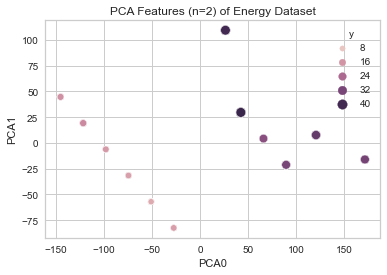

In [208]:
energy = pd.DataFrame()
energy['PCA0'] = X_2D[:,0]
energy['PCA1'] = X_2D[:,1]
energy['y'] = y
sns.scatterplot(data=energy, x='PCA0', y='PCA1', hue='y', size='y').set(title='PCA Features (n=2) of Energy Dataset');



## 5. Observations/Interpretation

### 5.1 Questions
1. For each task (classification and regression), which model performs best on the validation data using all features?

**Classification:**  
*When the two models were examined using all features, the random forest classifier model (validation accuracy = 0.944) scored better compared to the logistic regression model (validation accuracy = 0.917).*

**Regression:**  
*Linear regression and random forest regression were compared; random forest regression had only a mean squared error value (MSE) of 0.2, while linear regression had a MSE of 10.3. In this case, the larger value is representative of the error, so the random forest model scored better.*


2. For each task (classification and regression), which model performs best on the validation data using two principal components?

**Classification:**  
*Using only two principal components, the logistic regression model performed slightly better. The logistic regression validation score was found to be 0.725, while the random forest validation score was found to be 0.771.*

**Regression:**  
*The random forest model performed better again with only two principal components, with a MSE of 8.6, while linear regression had a MSE of 19.6.*

3. In each task (classification and regression), for each model, how do full feature and two principal component model scores compare on the validation data?

**Classification:**  
*Using full features resulted in a better validation score for all models (0.917 vs. 0.725 for logistic regression, 0.944 vs. 0.771 for random forest classification, 10.3 MSE vs. 19.6 MSE for linear regression, and 0.2 MSE vs. 8.6 MSE for random forest regression).*

**Regression:**  
*Using full features for both models resulted in lower MSE scores when compared with two principal components (10.3 vs. 19.6 for linear regression, and 0.2 vs. 8.6 for random forest.*

4. Do any of the models underfit or overfit? Provide examples.
**Underfitting**   
*Underfitting is usually identified by a low training score. The lowest training scores were logistic regression, PCA features (training score 0.729) and linear regression, PCA features (training score 0.8). To find if these models were underfitting the data, complexity would have to be increased, and the difference in validation scores compared. If the validation scores increased with increased complexity, then the original models were underfitting the data.*

**Overfitting**   
*Random forest classifier, all features (training score 0.999) random forest classifier, PCA features (training score 0.999), and random forest regressor (training score 1.0) are all likely overfitting, because they all have very high training scores (nearly or exactly perfect). This means that the algorithm is likely not identifying the true 'trend' of the data, and is even accounting for outlier data points. It's also possible that linear regression with all features (training score 0.9), random forest regression with all features (training score 0.9) and logistic regression with all features (training score 0.934) could be overfitting as well; these models had higher (but not perfect) training scores. To truly find if these models were overfitting the data, the complexity would have to be reduced and the differences in validation scores compared.*

### 5.2 Conclusion
Conclude on any one pattern you see emerge in your answers to questions above. Include the data to justify your conclusion.

*The following conclusions were made about this lab:*
*Better accuracy can likely be obtained by using all features instead of a few principal components. This was true for all models (0.917 vs. 0.725 for logistic regression, 0.944 vs. 0.771 for random forest classification, 10.3 MSE vs. 19.6 MSE for linear regression, and 0.2 MSE vs. 8.6 MSE for random forest regression).*

*The random forest regression algorithm appeared to perform better in both full featured and PCA featured models in comparison with the linear regression model. This may be possibly due to the fact that the energy data set does not have a linear relationship, and the tree-based random forest algorithm was able to better identify the trend of the data.*

*As a final conclusion, there isn't a single 'perfect' algorithm for every situation. Though only two models for both classification and regression were compared, it's clear that some models fit certain sets of data better.*


## 6. Reflection
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*Things I liked about this lab:*
*I enjoyed getting my hands dirty with scikit-learn. This didn't feel like a regular 'programming' lab, but instead was much more detailed about the data (which is probably going to be true for all AI and ML courses).*

*Things I disliked about the lab:*
*I struggled a bit with getting the seaborn plots to work. After some extensive googling, I found that adding `%matplotlib inline` is what enabled the plots to render. This may be also because I was using VScode instead of Jupyter Lab. Should future problems persist, I will begin to use Jupyter Lab.*